# Week 4 Exercises  

***Karlie Schwartzwald  
DSC 550 Fall 2022  
Bellevue University***

**Change Control Log:**  

Change#: 1  
Change(s) Made:   Complete assignment  
Date of Change:  9/25/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 9/25/2022

### Load the data as a Pandas data frame and ensure that it imported correctly.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load csv file
auto_mpg_df = pd.read_csv('auto-mpg.csv')

In [3]:
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Begin by prepping the data for modeling:

#### Remove the car name column.

In [4]:
auto_mpg_df = auto_mpg_df.drop(['car name'], axis=1)
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


#### The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.

In [5]:
# Change strings to NaN
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
# Change NaN to column mean
auto_mpg_df['horsepower'].fillna(auto_mpg_df['horsepower'].mean(), inplace=True)
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


#### Create dummy variables for the origin column.

In [6]:
# create dummies df
dummies = pd.get_dummies(auto_mpg_df['origin'])
# concatenate with auto_mpg_df
merged_df = pd.concat([auto_mpg_df,dummies], axis=1)
# drop origin column
merged_df = merged_df.drop(['origin'], axis=1)
merged_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,1,2,3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


### Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

In [7]:
matrix = merged_df.corr()
print(matrix)
print(f'\n The features with the highest correlation to mpg are weight, displacement, horsepower, and cylinders, which are all negatively correlated with mpg.')

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.771437 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.838939  0.896017   
displacement -0.804203   0.950721      1.000000    0.893646  0.932824   
horsepower   -0.771437   0.838939      0.893646    1.000000  0.860574   
weight       -0.831741   0.896017      0.932824    0.860574  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.684259 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.411651 -0.306564   
1            -0.568192   0.604351      0.651407    0.486083  0.598398   
2             0.259022  -0.352861     -0.373886   -0.281258 -0.298843   
3             0.442174  -0.396479     -0.433505   -0.321325 -0.440817   

              acceleration  model year         1         2         3  
mpg               0.420289    0.579267 -0.568192  0.259022  0.442174  
cylinders        -0.505419   -0.348746  0.604351 -0.35

### Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

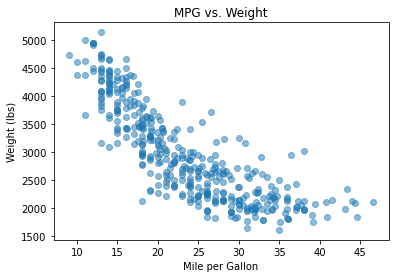

This scatterplot shows a clear downward trend for weight as miles per gallon increases. This is also shown with the corresponding correlation coefficient being close to negative 1.


In [8]:
plt.scatter(merged_df['mpg'], merged_df['weight'], alpha=0.5)
plt.title("MPG vs. Weight")
plt.xlabel("Mile per Gallon")
plt.ylabel("Weight (lbs)")
plt.show()
print(f'This scatterplot shows a clear downward trend for weight as miles per gallon increases. This is also shown with the corresponding correlation coefficient being close to negative 1.')

### Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [9]:
# seperate target feature
attributes = merged_df.drop(['mpg'], axis=1)
target = merged_df['mpg']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# test train split
x_train, x_test, y_train, y_test = train_test_split(attributes, target, test_size = 0.2)

### Train an ordinary linear regression on the training data.

In [12]:
# libraries
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train, y_train)

LinearRegression()

### Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [15]:
predict_y_train = model.predict(x_train)
predict_y_test = model.predict(x_test)

In [16]:
import sklearn.metrics as metrics

In [17]:
train_mae = metrics.mean_absolute_error(y_train, predict_y_train)
train_mse = metrics.mean_squared_error(y_train, predict_y_train)
train_rmse = np.sqrt(train_mse) 
train_r2 = metrics.r2_score(y_train, predict_y_train)

In [18]:
test_mae = metrics.mean_absolute_error(y_test, predict_y_test)
test_mse = metrics.mean_squared_error(y_test, predict_y_test)
test_rmse = np.sqrt(test_mse) 
test_r2 = metrics.r2_score(y_test,predict_y_test)

In [19]:
print(f' The R2 value for the train data is {train_r2}.')
print(f'\n The RMSE value for the train data is {train_rmse}.')
print(f'\n The MAE value for the train data is {train_mae}.')
print(f'\n\n The R2 value for the test data is {test_r2}.')
print(f'\n The RMSE value for the test data is {test_rmse}.')
print(f'\n The MAE value for the test data is {test_mae}.')

 The R2 value for the train data is 0.8226533423526422.

 The RMSE value for the train data is 3.2488848349409003.

 The MAE value for the train data is 2.4465337429523153.


 The R2 value for the test data is 0.8257074539548609.

 The RMSE value for the test data is 3.3958125918705218.

 The MAE value for the test data is 2.740662818064505.


### Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [20]:
#Polynomial Regression (Quadratic)
# import poly features
from sklearn.preprocessing import PolynomialFeatures

In [21]:
# degree 2 polynomial object
poly = PolynomialFeatures(degree=2, include_bias=False)

In [22]:
#transform into 2d array
poly_features_train = poly.fit_transform(x_train)
poly_features_test = poly.fit_transform(x_test)

In [23]:
# call linear regression object
poly_reg_model = LinearRegression()

In [24]:
# train model
poly_reg_model.fit(poly_features_train, y_train)

LinearRegression()

In [25]:
# predict values
predict_y_train_poly = poly_reg_model.predict(poly_features_train)
predict_y_test_poly = poly_reg_model.predict(poly_features_test)

In [26]:
poly_train_mae = metrics.mean_absolute_error(y_train, predict_y_train_poly)
poly_train_mse = metrics.mean_squared_error(y_train, predict_y_train_poly)
poly_train_rmse = np.sqrt(poly_train_mse) 
poly_train_r2 = metrics.r2_score(y_train, predict_y_train_poly)

In [27]:
poly_test_mae = metrics.mean_absolute_error(y_test, predict_y_test_poly)
poly_test_mse = metrics.mean_squared_error(y_test, predict_y_test_poly)
poly_test_rmse = np.sqrt(poly_test_mse) 
poly_test_r2 = metrics.r2_score(y_test, predict_y_test_poly)

In [29]:
print(f' The R2 value for the train data is {poly_train_r2}.')
print(f'\n The RMSE value for the train data is {poly_train_rmse}.')
print(f'\n The MAE value for the train data is {poly_train_mae}.')
print(f'\n\n The R2 value for the test data is {poly_test_r2}.')
print(f'\n The RMSE value for the test data is {poly_test_rmse}.')
print(f'\n The MAE value for the test data is {poly_test_mae}.')
print('\nThese results are much better than the linear regression.')

 The R2 value for the train data is 0.8920417731363728.

 The RMSE value for the train data is 2.534840774622444.

 The MAE value for the train data is 1.7874294434714817.


 The R2 value for the test data is 0.9283279473941277.

 The RMSE value for the test data is 2.177605619142765.

 The MAE value for the test data is 1.7135260525602387.

These results are much better than the linear regression.
